# **Practicing Model Training**

In [0]:
from sklearn import datasets
import sklearn.datasets
import numpy as np
import pandas as pd

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()
type(breast_cancer)

X=breast_cancer.data
Y=breast_cancer.target
type(X)


numpy.ndarray

In [0]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [0]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data.head()
data['class']=breast_cancer.target

In [0]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [0]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [0]:
print(data.groupby('class').mean())

       mean radius  mean texture  ...  worst symmetry  worst fractal dimension
class                             ...                                         
0        17.462830     21.604906  ...        0.323468                 0.091530
1        12.146524     17.914762  ...        0.270246                 0.079442

[2 rows x 30 columns]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data.drop('class',axis=1)
Y=data['class']

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=1)

Now, perform binarization. Here, we are expecting to have 0 or 1 as classification.

In [0]:
import matplotlib.pyplot as plt

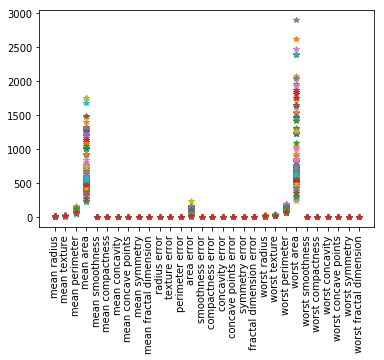

In [0]:
plt.plot(X_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

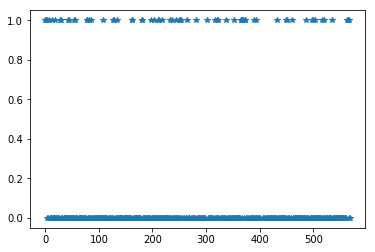

In [0]:
mean_binarized=X_train['mean area'].map(lambda x:  1 if x>1000  else 0)

plt.plot(mean_binarized,'*')
plt.show()

In [0]:
X_binarized_train=X_train.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(X_binarized_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarized_test=X_test.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(X_binarized_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
type(X_binarized_test)

pandas.core.frame.DataFrame

In [0]:
X_binarized_test=X_binarized_test.values

In [0]:
type(X_binarized_test)

numpy.ndarray

In [0]:
X_binarized_train=X_binarized_train.values

Using above train and test data for MP neurons

In [0]:
from random import randint

In [0]:
for b in range(X_binarized_train.shape[1]+1):
  Y_pred_train = []
  accurate_rows = 0
  
  for x,y in zip(X_binarized_train, Y_train):
    y_pred=(np.sum(x)>=b)
    

In [85]:
from sklearn.metrics import accuracy_score
b=28

Y_pred_test=[]
for x in X_binarized_test:
  y_pred=(np.sum(x)>=b)
  Y_pred_test.append(y_pred)
  
accuracy=accuracy_score(Y_pred_test,Y_test)
print(b,accuracy)

28 0.7807017543859649


MP Neuron Class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b=None #single parameter
  def model(self,x): #inference summing the values and check with b
    return(sum(x)>=self.b)
  def predict(self, X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy={}
    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)
      
    best_b=max(accuracy, key=accuracy.get)
    
    self.b=best_b
    print('Optimal value is b', best_b)
    print('Highest accuracy is', accuracy[best_b])
    
    
    
    
  
    

In [0]:
mp=MPNeuron()
mp.fit(X_binarized_train,Y_train)


In [0]:
Y_test_pred=mp_neuron.predict(X_binarized_test)
accuracy_test=accuracy_score(Y_test_pred, Y_test)

MP Nueron Code in Nutshell

*   Binarization
*   Models or inference
*   Predict Target
*   Fit fuction to get accuracy
*   Choose max, use proper dict format
*   Create objects for train and test data